<a href="https://colab.research.google.com/github/ChoudharyImran/Lab-5-Exploring-the-Dataset/blob/main/Lab_21_Bar_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-08-21 07:16:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  22.4MB/s    in 8.1s    

2025-08-21 07:17:08 (18.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



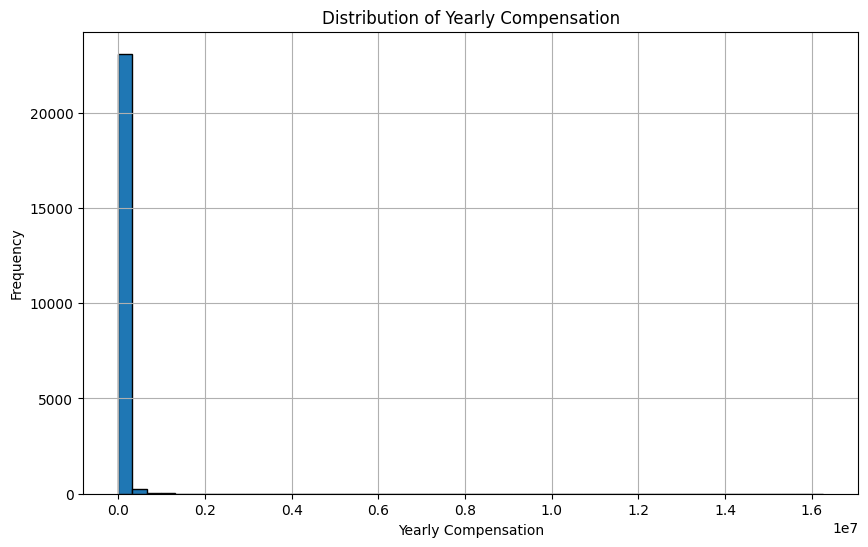

In [4]:
# Create a histogram of the ConvertedCompYearly column
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedCompYearly'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



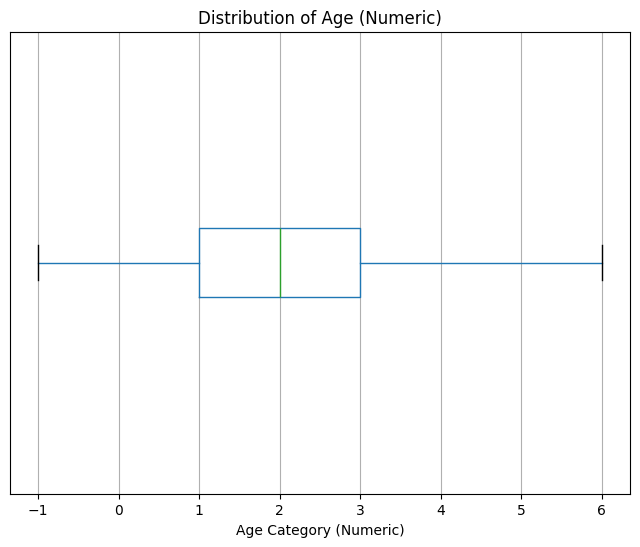

In [5]:
# Convert Age to numerical values
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
df['Age_numeric'] = df['Age'].astype('category').cat.set_categories(age_order, ordered=True).cat.codes

# Create a box plot of Age_numeric
plt.figure(figsize=(8, 6))
df.boxplot(column='Age_numeric', vert=False)
plt.title('Distribution of Age (Numeric)')
plt.xlabel('Age Category (Numeric)')
plt.yticks([]) # Hide y-axis ticks as it's a single box plot
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



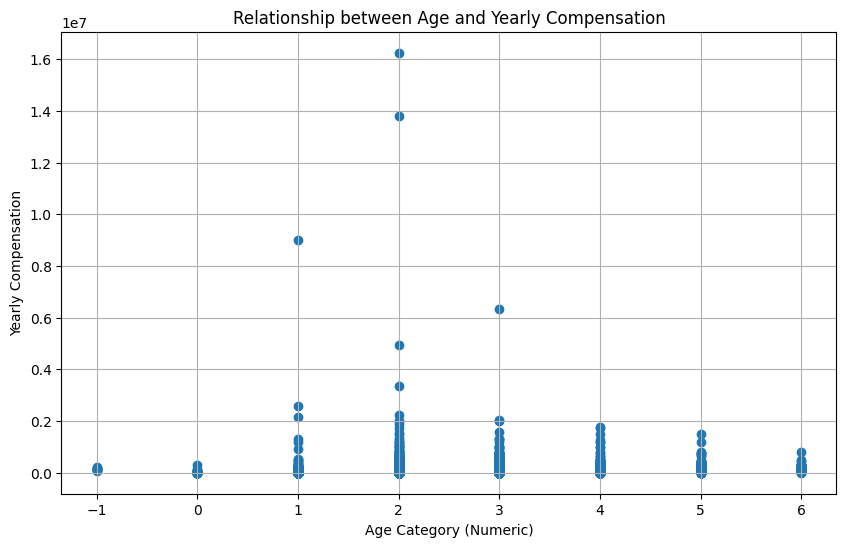

In [6]:
# Create a scatter plot of Age_numeric and ConvertedCompYearly
plt.figure(figsize=(10, 6))
plt.scatter(df['Age_numeric'], df['ConvertedCompYearly'])
plt.title('Relationship between Age and Yearly Compensation')
plt.xlabel('Age Category (Numeric)')
plt.ylabel('Yearly Compensation')
plt.grid(True)
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


/usr/local/lib/python3.12/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


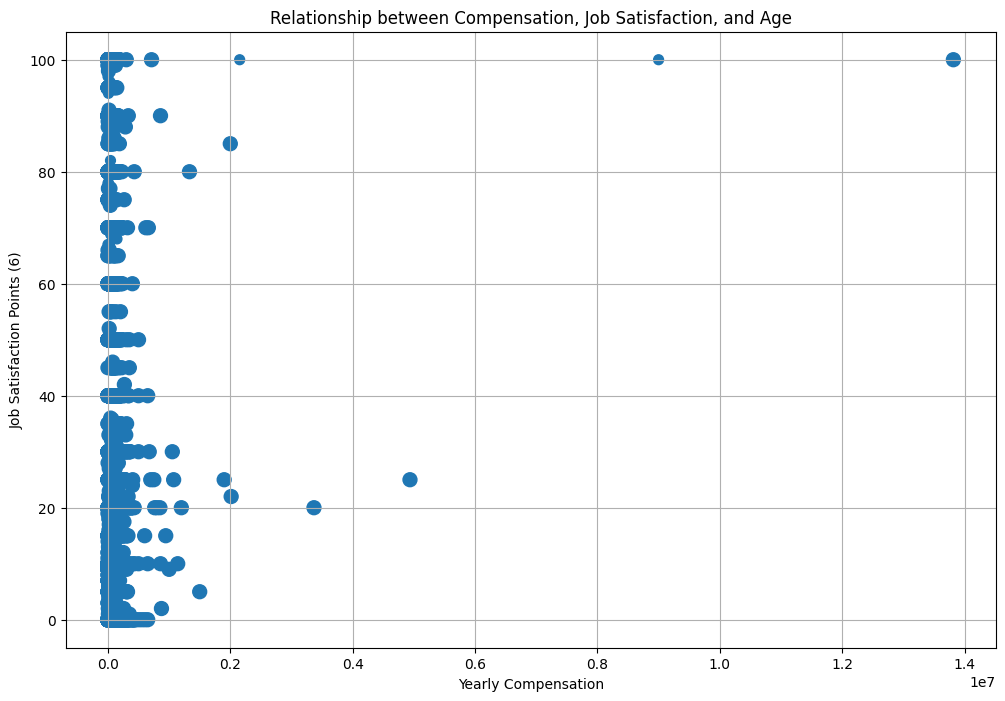

In [7]:
# Create a bubble plot
plt.figure(figsize=(12, 8))
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], s=df['Age_numeric']*50) # Scale age for better visibility of bubbles
plt.title('Relationship between Compensation, Job Satisfaction, and Age')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Points (6)')
plt.grid(True)
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



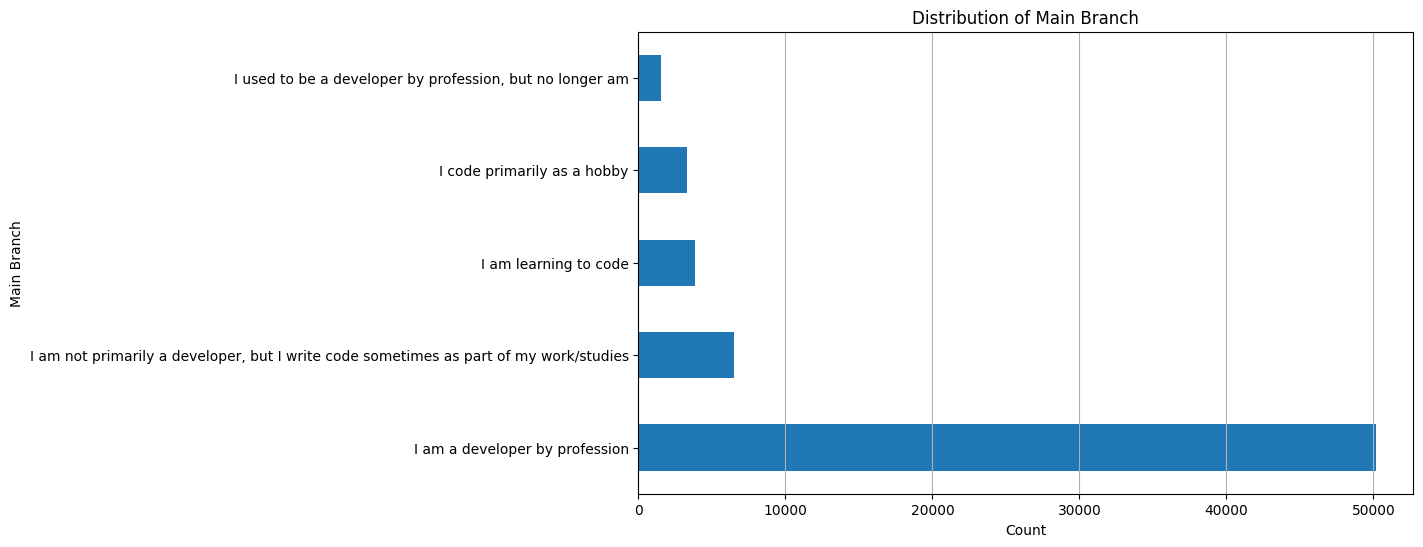

In [8]:
# Calculate the distribution of the MainBranch column
main_branch_counts = df['MainBranch'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh')
plt.title('Distribution of Main Branch')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.grid(axis='x')
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



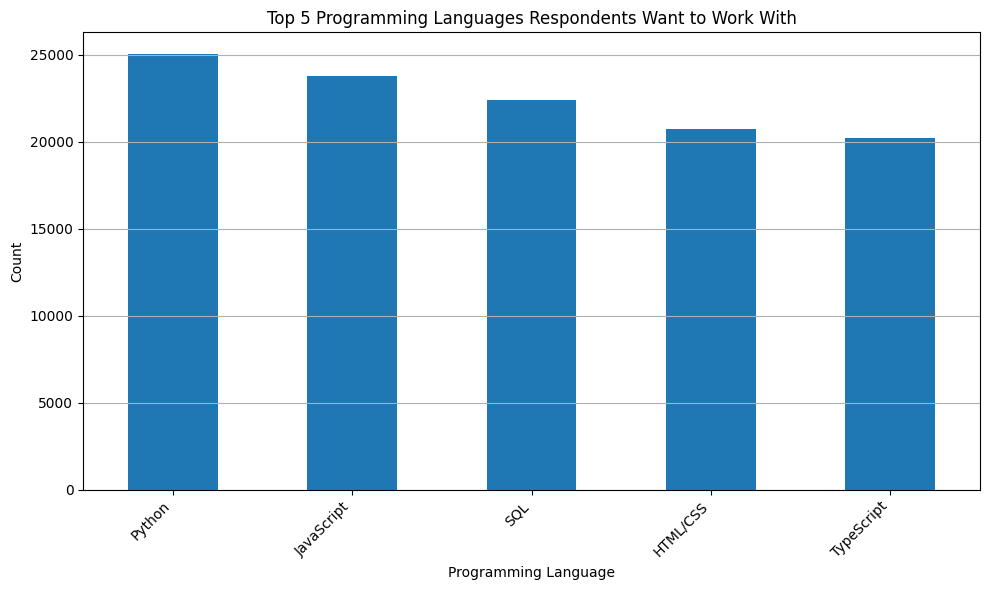

In [9]:
# Process the LanguageWantToWorkWith column
languages_list = df['LanguageWantToWorkWith'].str.split(';', expand=True).stack()
language_counts = languages_list.value_counts()

# Get the top 5 languages
top_5_languages = language_counts.head(5)

# Create a vertical bar chart of the top 5 languages
plt.figure(figsize=(10, 6))
top_5_languages.plot(kind='bar')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


<Figure size 1000x600 with 0 Axes>

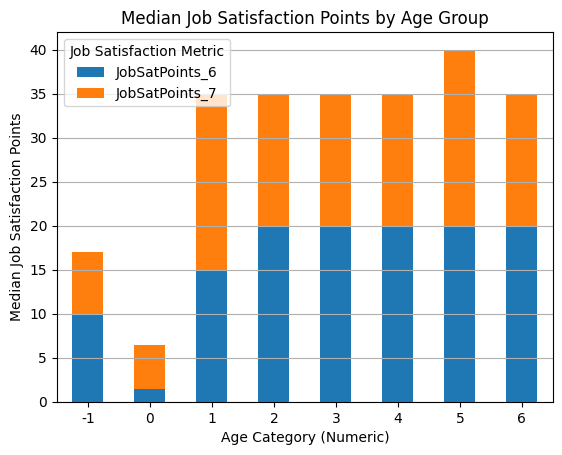

In [10]:
# Calculate the median JobSatPoints_6 and JobSatPoints_7 by Age_numeric
job_sat_median = df.groupby('Age_numeric')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
job_sat_median.plot(kind='bar', stacked=True)
plt.title('Median Job Satisfaction Points by Age Group')
plt.xlabel('Age Category (Numeric)')
plt.ylabel('Median Job Satisfaction Points')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.grid(axis='y')
plt.legend(title='Job Satisfaction Metric')
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



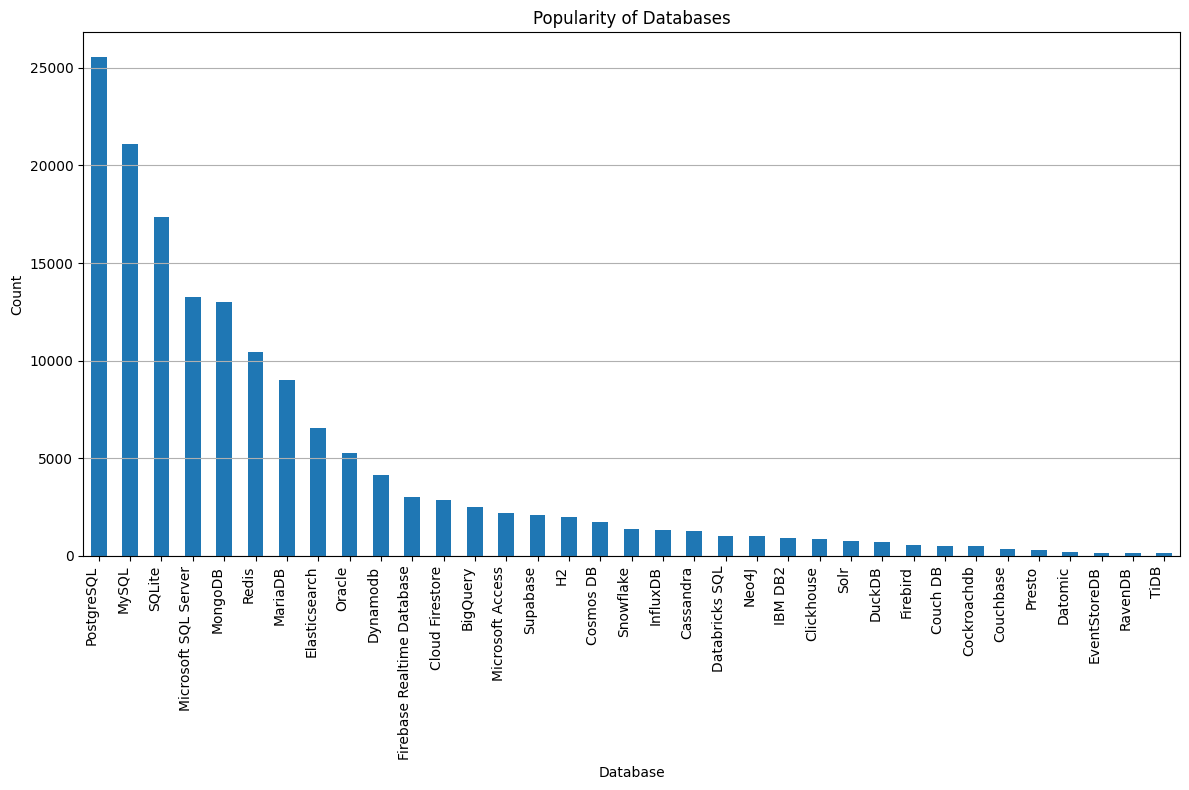

In [11]:
# Process the DatabaseHaveWorkedWith column
databases_list = df['DatabaseHaveWorkedWith'].str.split(';', expand=True).stack()
database_counts = databases_list.value_counts()

# Create a bar chart of database counts
plt.figure(figsize=(12, 8))
database_counts.plot(kind='bar')
plt.title('Popularity of Databases')
plt.xlabel('Database')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right') # Rotate labels for better readability
plt.grid(axis='y')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



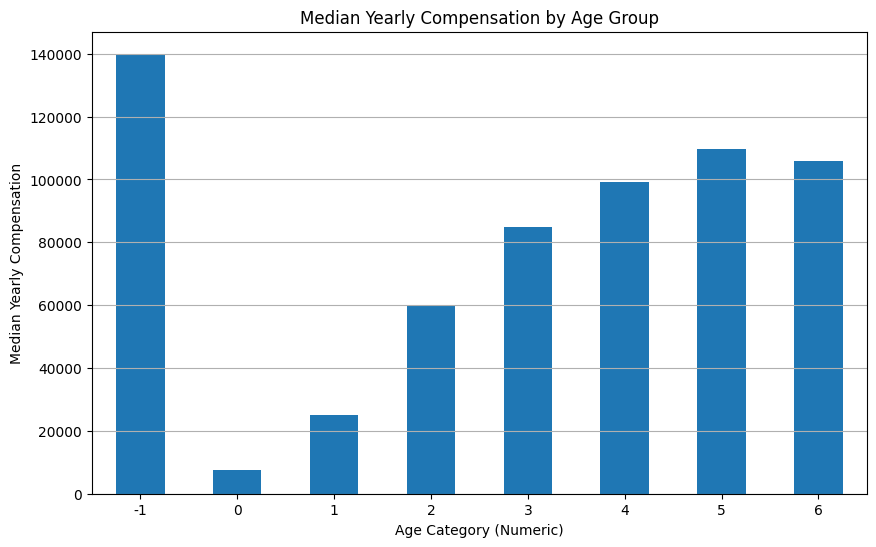

In [12]:
# Calculate the median ConvertedCompYearly by Age_numeric
median_comp_by_age = df.groupby('Age_numeric')['ConvertedCompYearly'].median()

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
median_comp_by_age.plot(kind='bar')
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Category (Numeric)')
plt.ylabel('Median Yearly Compensation')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.grid(axis='y')
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



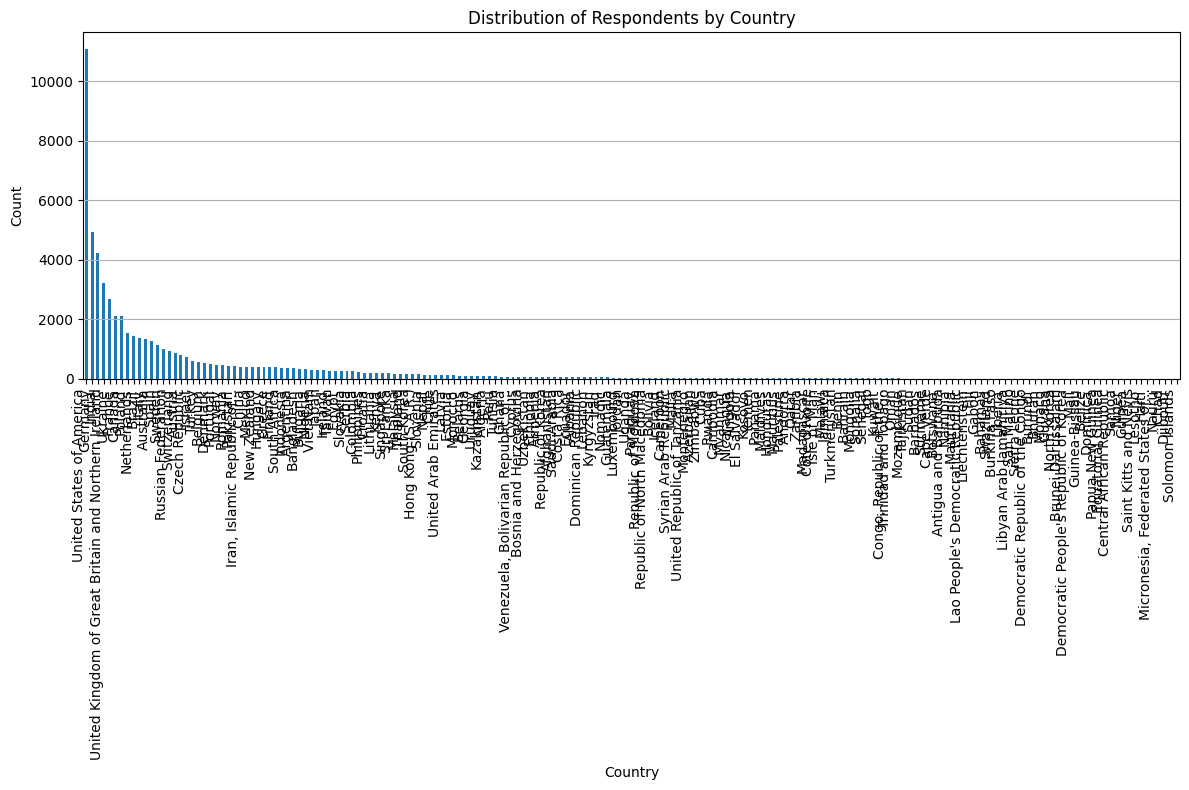

In [13]:
# Calculate the distribution of respondents by country
country_counts = df['Country'].value_counts()

# Create a bar chart of country counts
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar')
plt.title('Distribution of Respondents by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right') # Rotate labels for better readability
plt.grid(axis='y')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
